In [1]:
# импортируем необходимые библиотеки, классы и функции
import multiprocessing
multiprocessing.set_start_method('fork')

import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import numpy as np
np.random.seed(42)

# загружаем данные
df = pd.read_csv('Data/baltimore_crime.csv')
df.columns = ['ds', 'y']

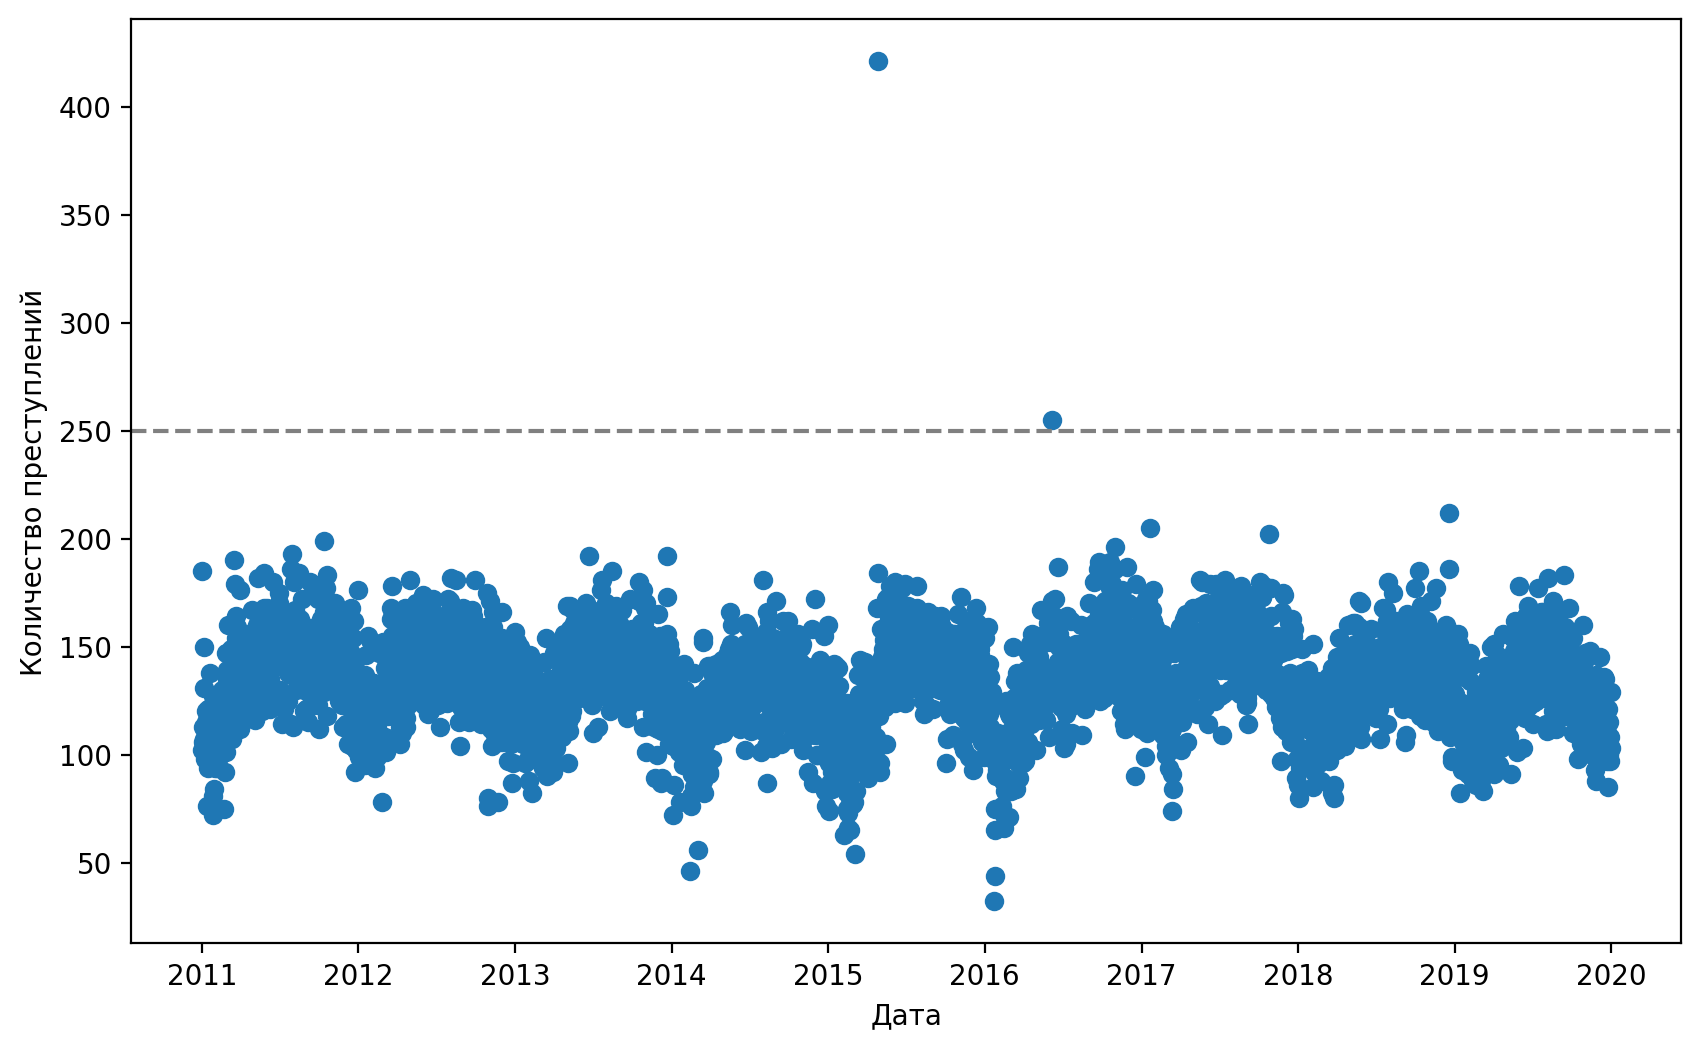

In [2]:
# визуализируем данные
plt.figure(figsize=(10, 6))
plt.scatter(pd.to_datetime(df['ds']), df['y'])
plt.axhline(250, ls='--', c='gray')
plt.xlabel('Дата')
plt.ylabel('Количество преступлений')
plt.show()

In [3]:
# удаляем выбросы
df.loc[df['y'] > 250, 'y'] = None

22:19:21 - cmdstanpy - INFO - Chain [1] start processing
22:19:22 - cmdstanpy - INFO - Chain [1] done processing


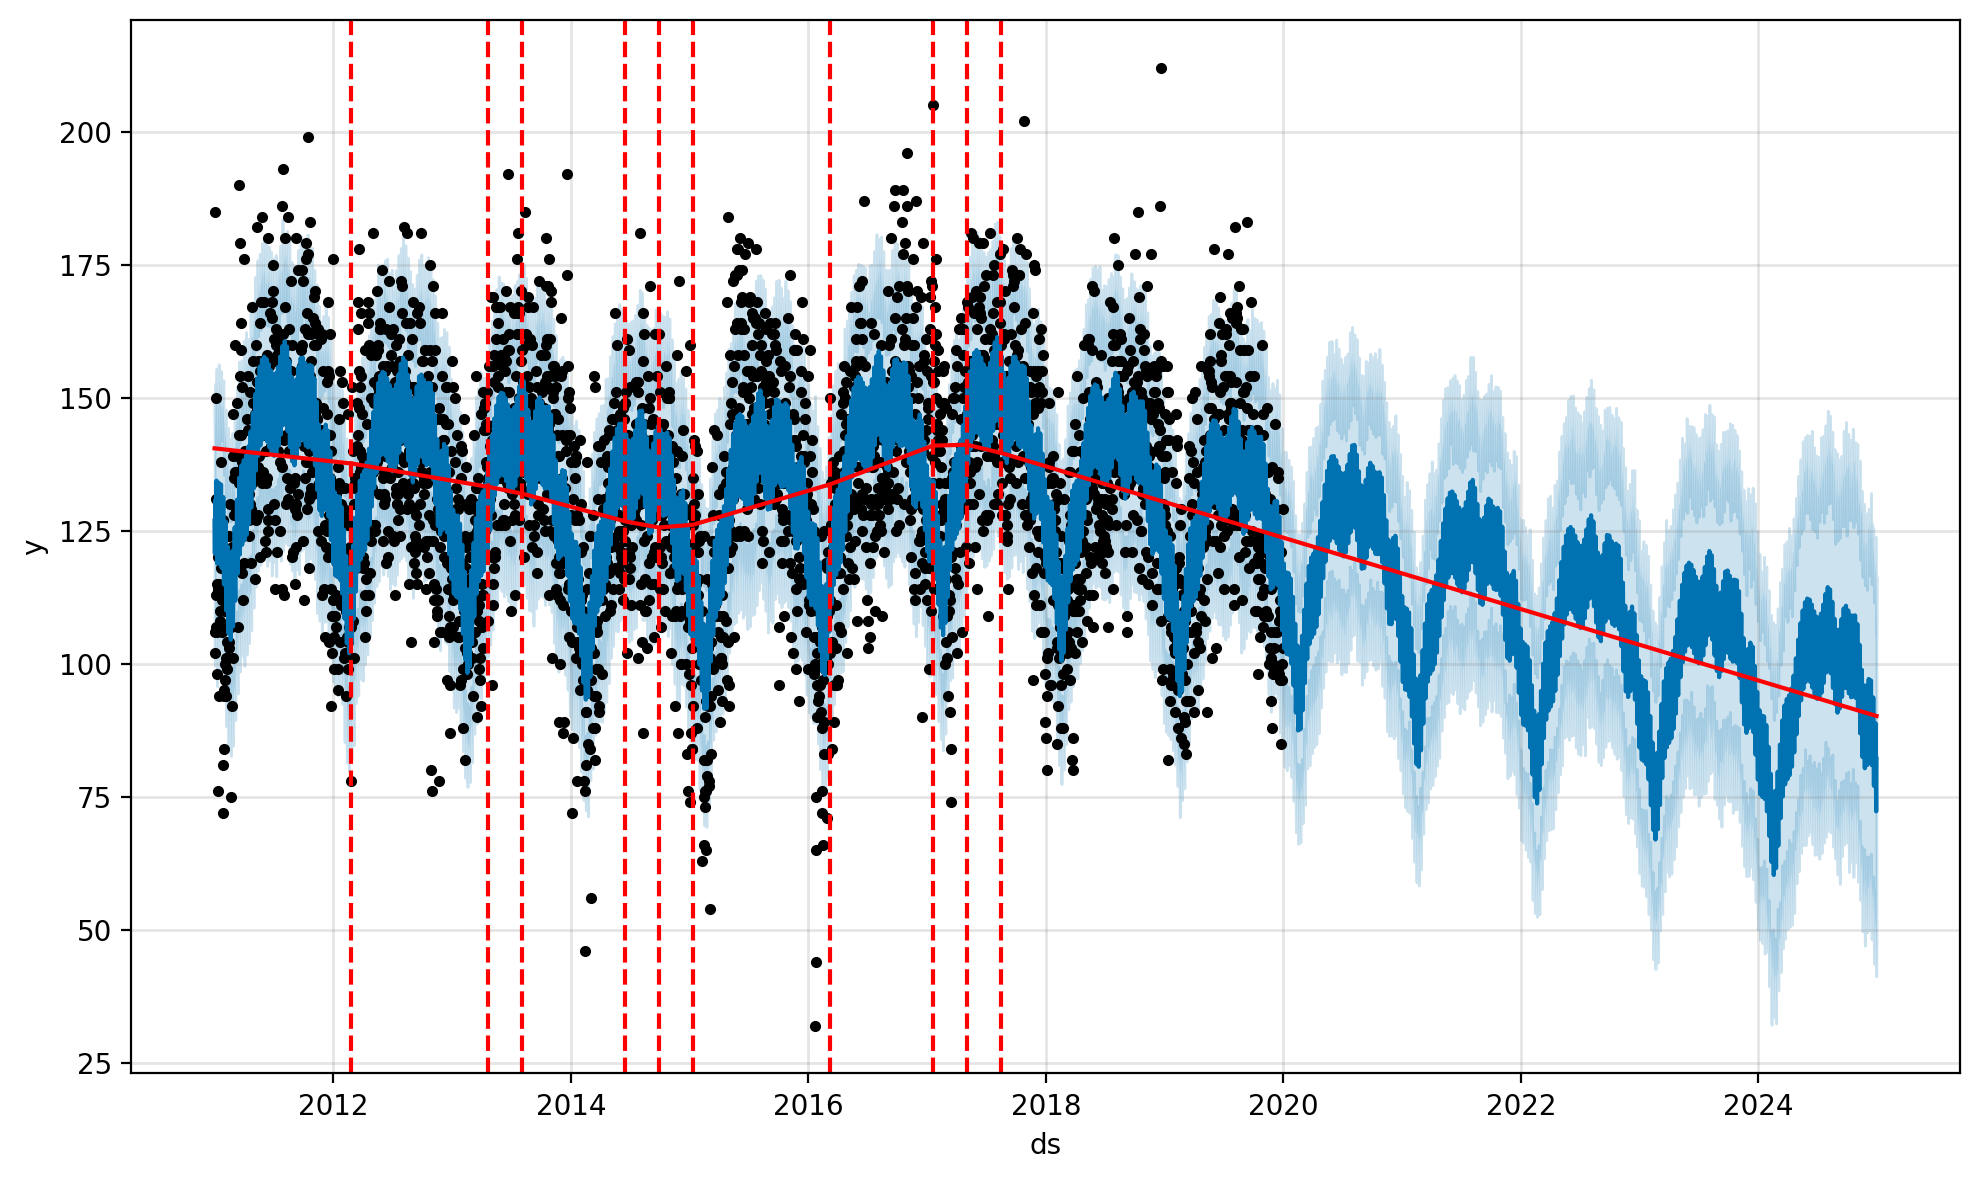

In [4]:
# создаем модель Prophet
model = Prophet(uncertainty_samples=1000)
# обучаем модель
model.fit(df)
# создаем удлиненный датафрейм, 
# задав горизонт 1825 дней (5 лет)
future = model.make_future_dataframe(periods=365 * 5)
# получаем прогнозы
forecast = model.predict(future)
# визуализируем прогнозы
fig = model.plot(forecast)
# наносим точки изменения тренда
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

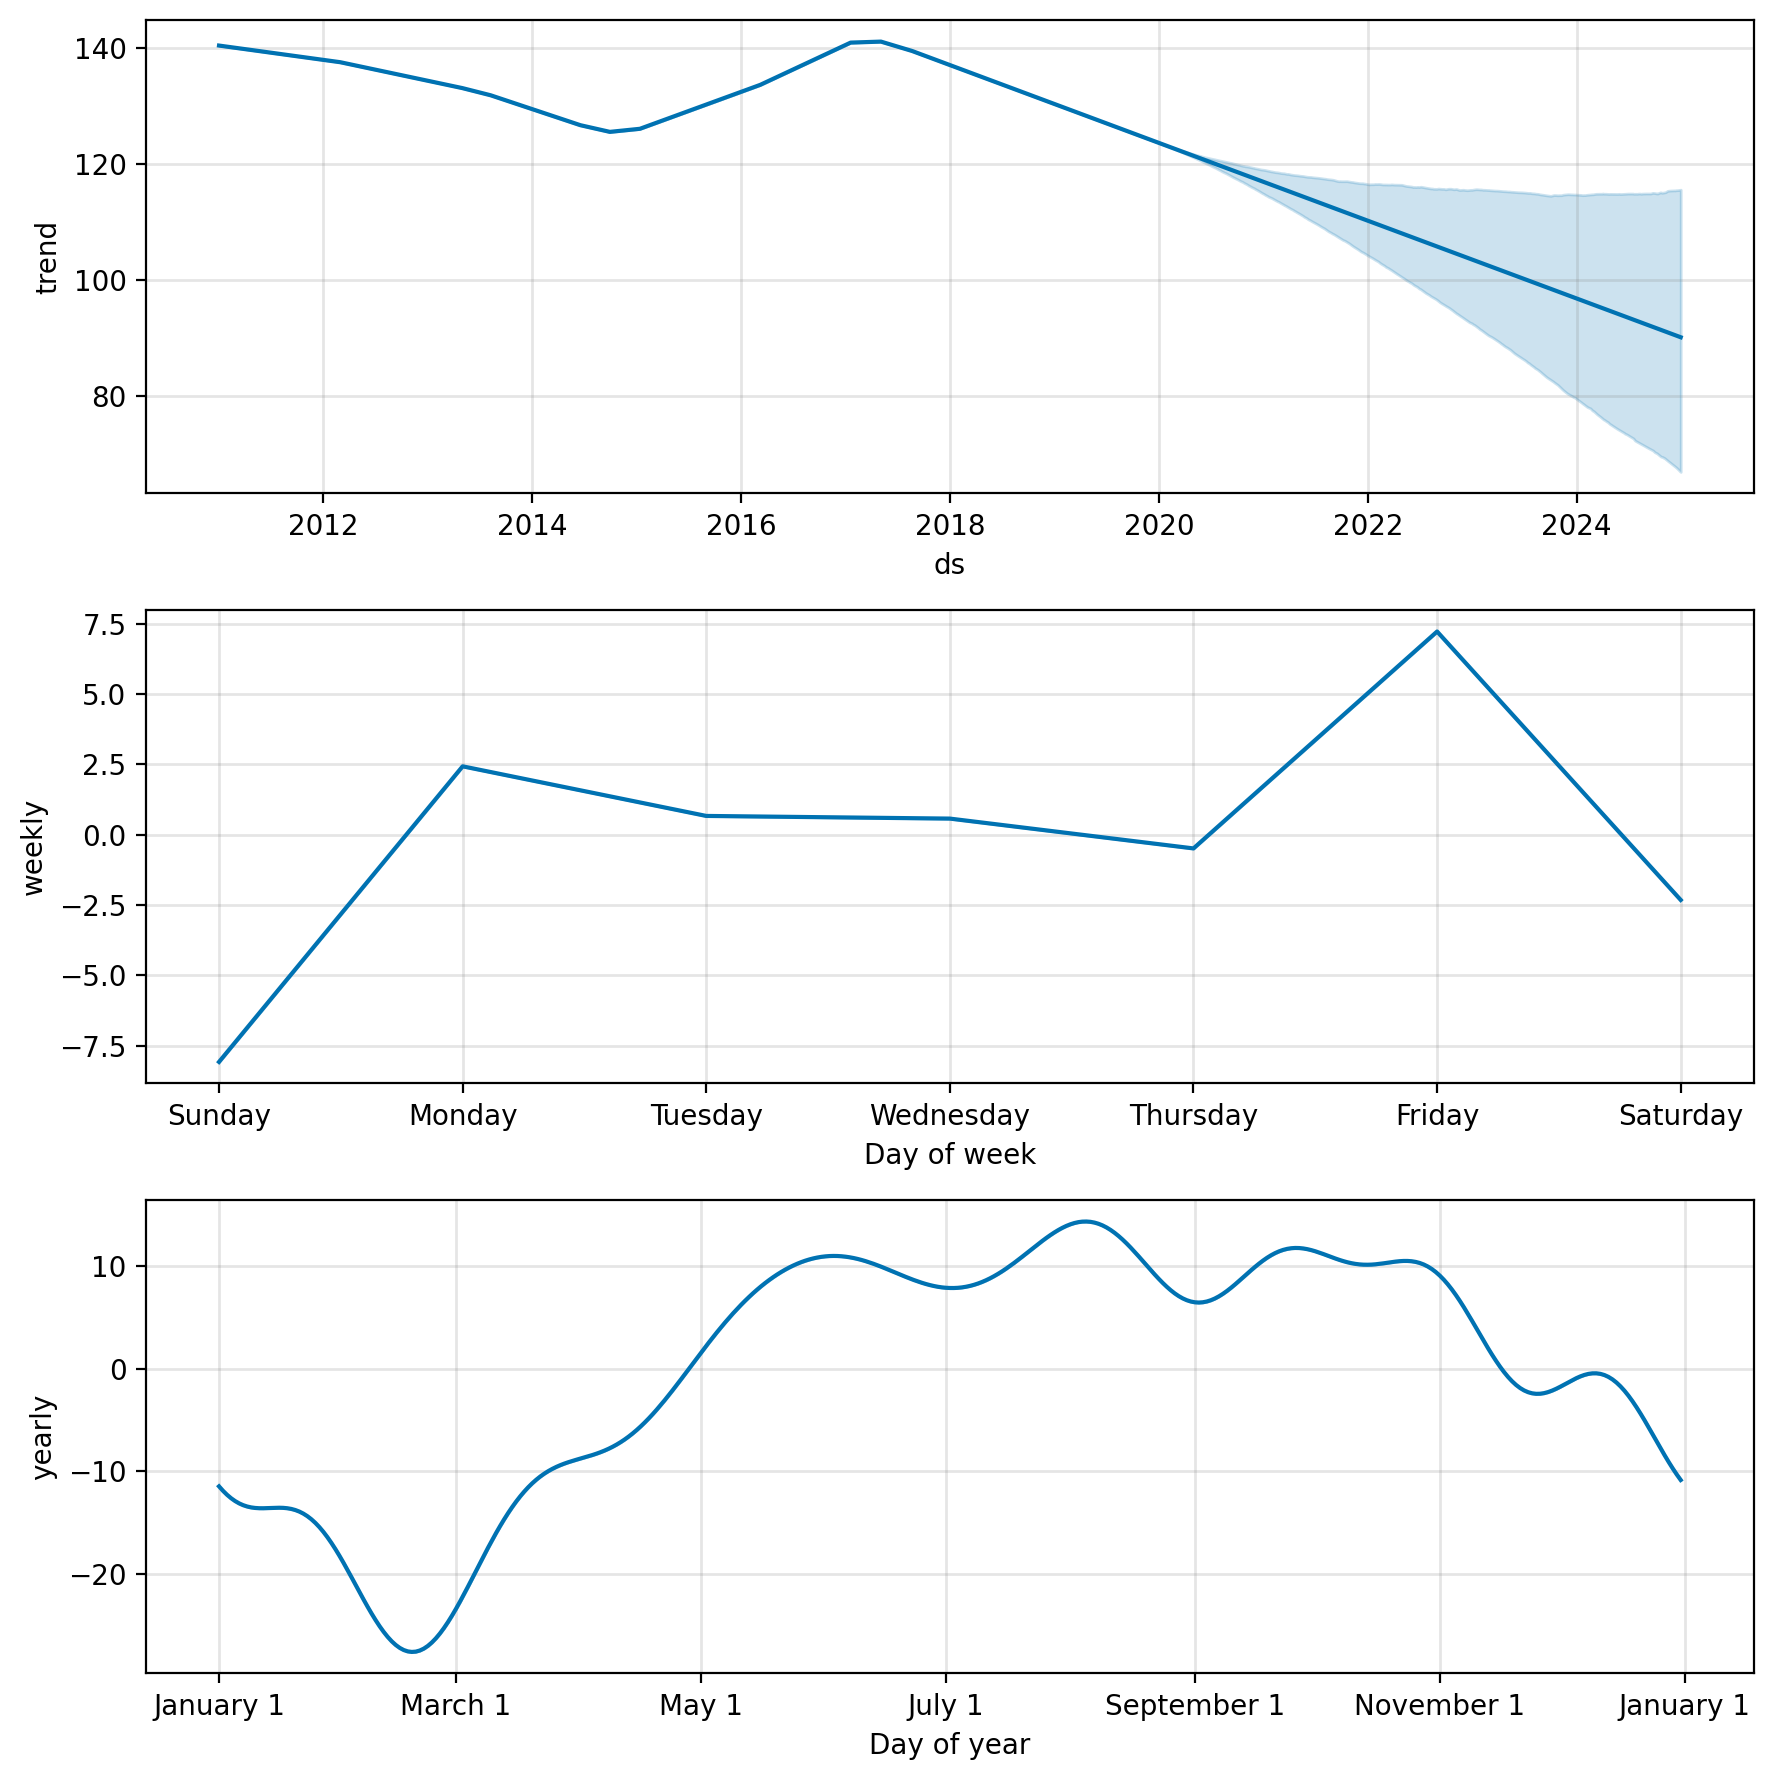

In [5]:
# строим графики компонент
fig2 = model.plot_components(forecast)
plt.show()

In [6]:
# сохраним модель и прогнозы для
# использования в дальнейшем
m0 = model
f0 = forecast

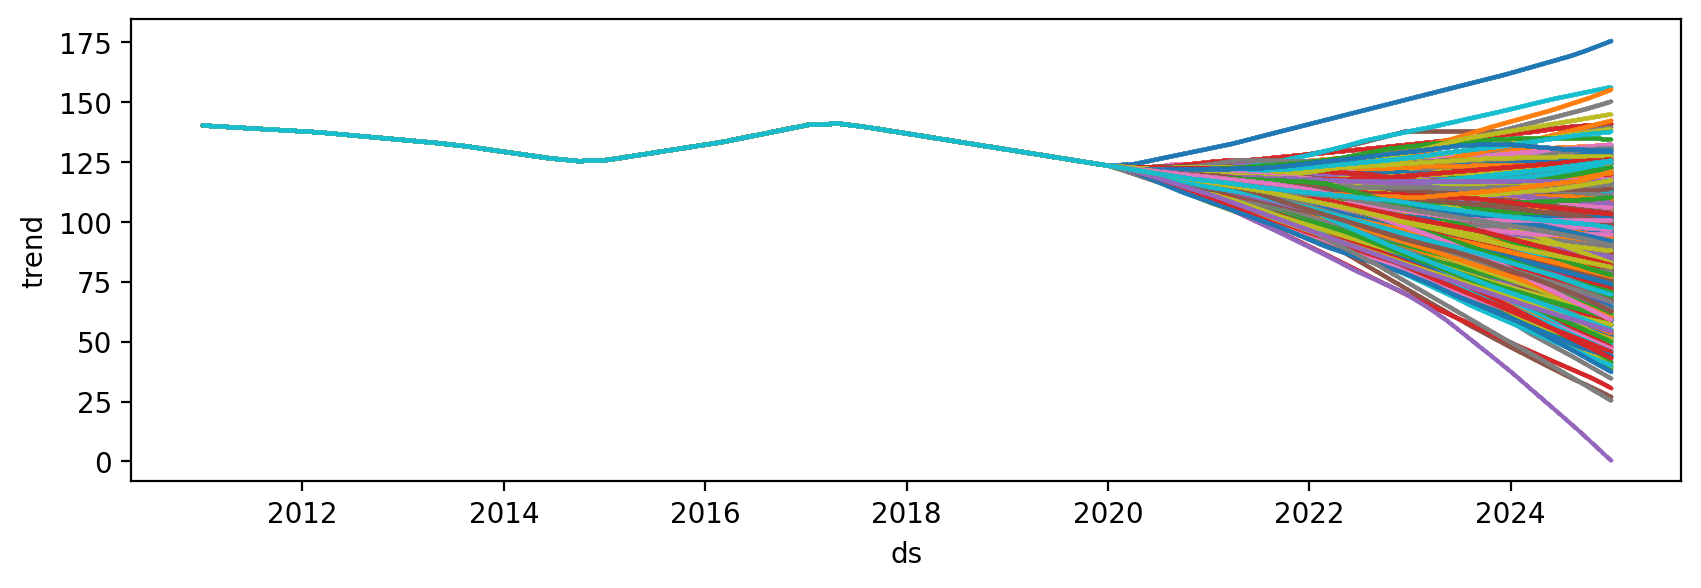

In [7]:
# записываем результаты симуляций Монте-Карло
samples = model.predictive_samples(future)
# визуализируем
plt.figure(figsize=(10, 3))
for idx in range(model.uncertainty_samples):
    plt.scatter(future['ds'], samples['trend'][:, idx], 
                s=.1, alpha=1)
plt.xlabel('ds')
plt.ylabel('trend')
plt.show()

In [8]:
# cоздаем модель Prophet, увеличив
# ширину доверительного интервала
model = Prophet(interval_width=0.99)
# обучаем модель
model.fit(df)
# создаем удлиненный датафрейм, 
# задав горизонт 1825 дней (5 лет)
future = model.make_future_dataframe(periods=365 * 5)
# получаем прогнозы
forecast = model.predict(future)

22:19:43 - cmdstanpy - INFO - Chain [1] start processing
22:19:43 - cmdstanpy - INFO - Chain [1] done processing


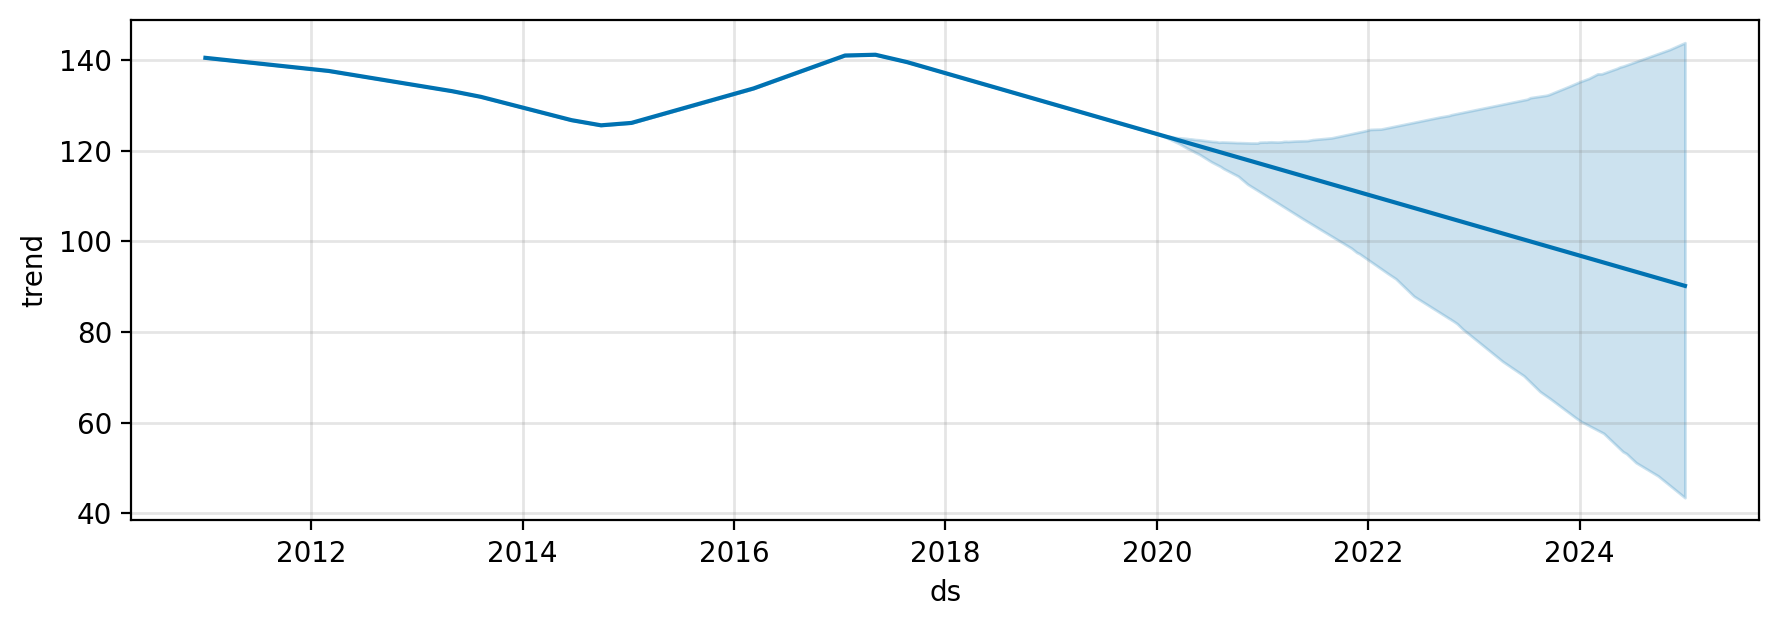

In [9]:
# импортируем функцию plot_forecast_component()
from prophet.plot import plot_forecast_component
# визуализируем тренд
plot_forecast_component(model,
                        forecast,
                        'trend',
                        figsize=(10.5, 3.25))
plt.show()

22:19:46 - cmdstanpy - INFO - CmdStan installation /Users/artemgruzdev/anaconda3/lib/python3.10/site-packages/prophet/stan_model/cmdstan-2.26.1 missing makefile, cannot get version.
22:19:46 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
22:19:46 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

22:22:34 - cmdstanpy - INFO - CmdStan done processing.
22:22:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/Users/runner/work/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/Users/runner/work/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in '/Users/runner/work/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/Users/runner/work/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/Users/runner/work/prophet/

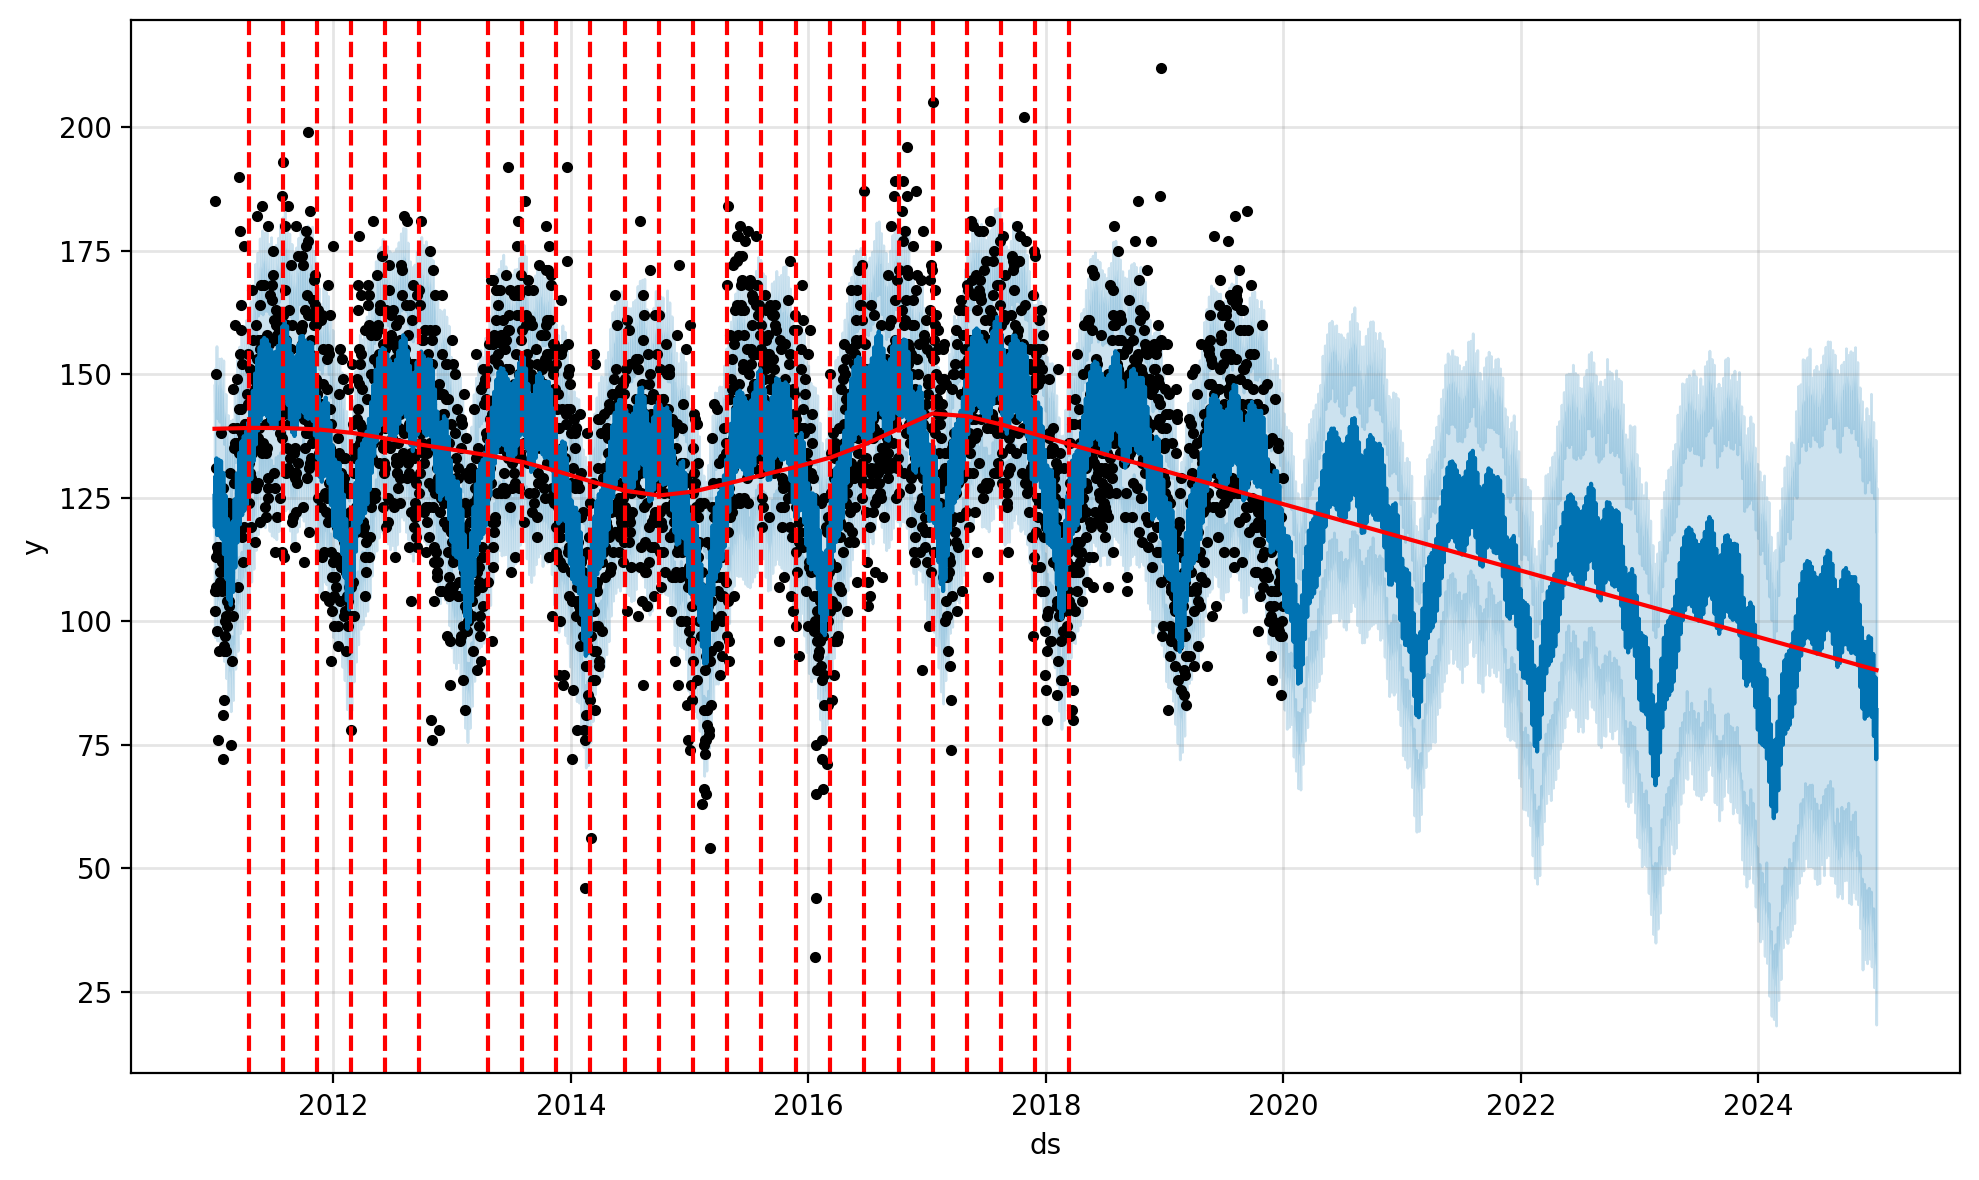

In [10]:
# cоздаем модель Prophet
model = Prophet(mcmc_samples=300)
# обучаем модель
model.fit(df)
# создаем удлиненный датафрейм, 
# задав горизонт 1825 дней (5 лет)
future = model.make_future_dataframe(periods=365 * 5)
# получаем прогнозы
forecast = model.predict(future)
# визуализируем прогнозы
fig = model.plot(forecast)
# наносим точки изменения тренда
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

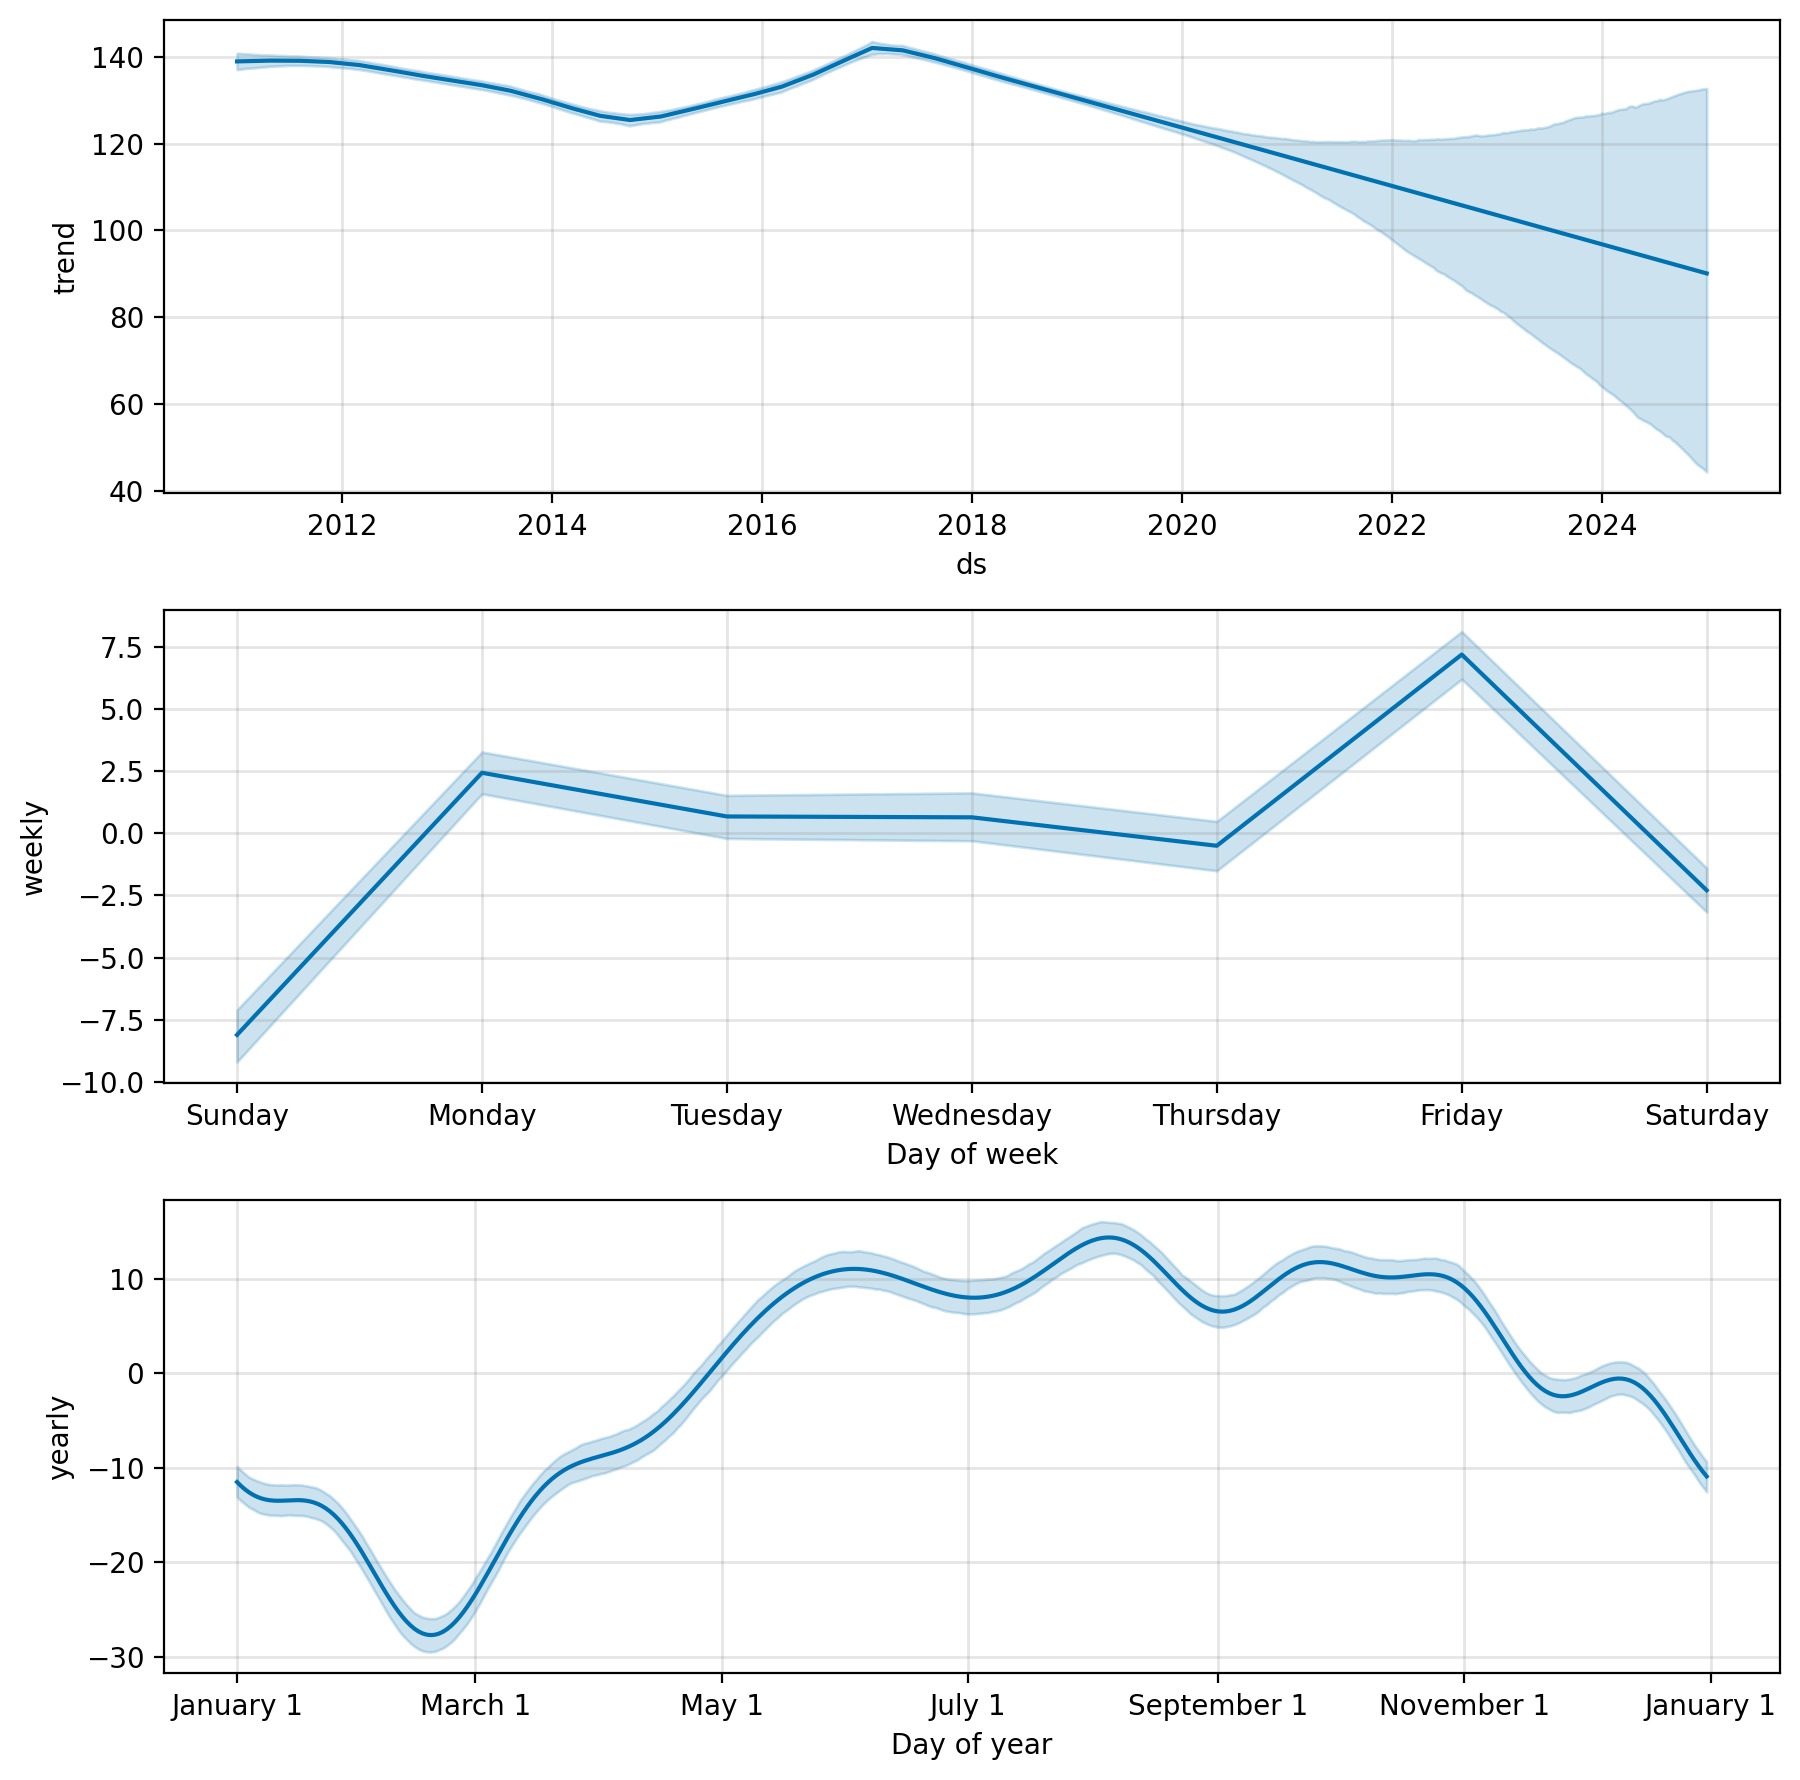

In [11]:
# строим графики компонент
fig2 = model.plot_components(forecast)
plt.show()

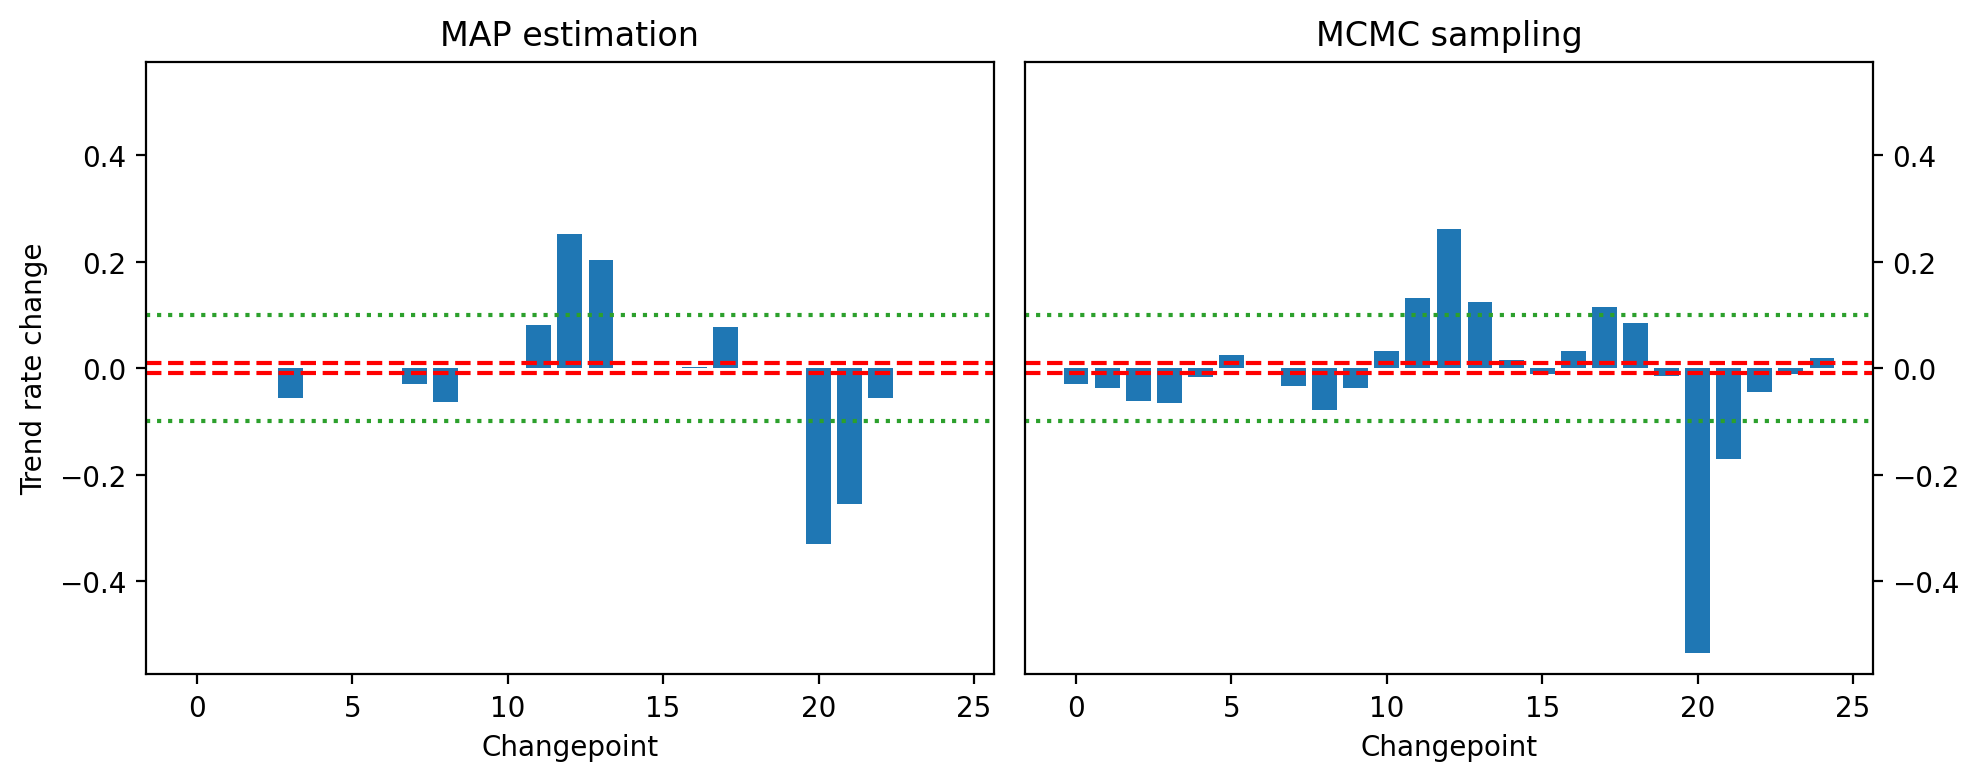

In [12]:
# построим графики величин точек изменения для 
# нашей первой модели и нашей последней модели
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(121)
ax1.bar(np.arange(25), 
        np.nanmean(m0.params['delta'], axis=0))
ax1.set_title('MAP estimation')
ax1.set_xlabel('Changepoint')
ax1.set_ylabel('Trend rate change')
ax1.axhline(y=0.01, color='r', ls='--')
ax1.axhline(y=-0.01, color='r', ls='--')
ax1.axhline(y=0.1, color='tab:green', ls=':')
ax1.axhline(y=-0.1, color='tab:green', ls=':')

ax2 = fig.add_subplot(122)
ax2.bar(np.arange(25), 
        np.nanmean(model.params['delta'], axis=0))
ax2.set_xlabel('Changepoint')
ax2.axhline(y=0.01, color='r', ls='--')
ax2.axhline(y=-0.01, color='r', ls='--')
ax2.axhline(y=0.1, color='tab:green', ls=':')
ax2.axhline(y=-0.1, color='tab:green', ls=':')
ax2.set_title('MCMC sampling')
ax2.yaxis.tick_right()

ylim = max([abs(val) for val in ax1.get_ylim() + ax2.get_ylim()])
ax1.set_ylim(-ylim, ylim)
ax2.set_ylim(-ylim, ylim)

plt.tight_layout()
plt.show()

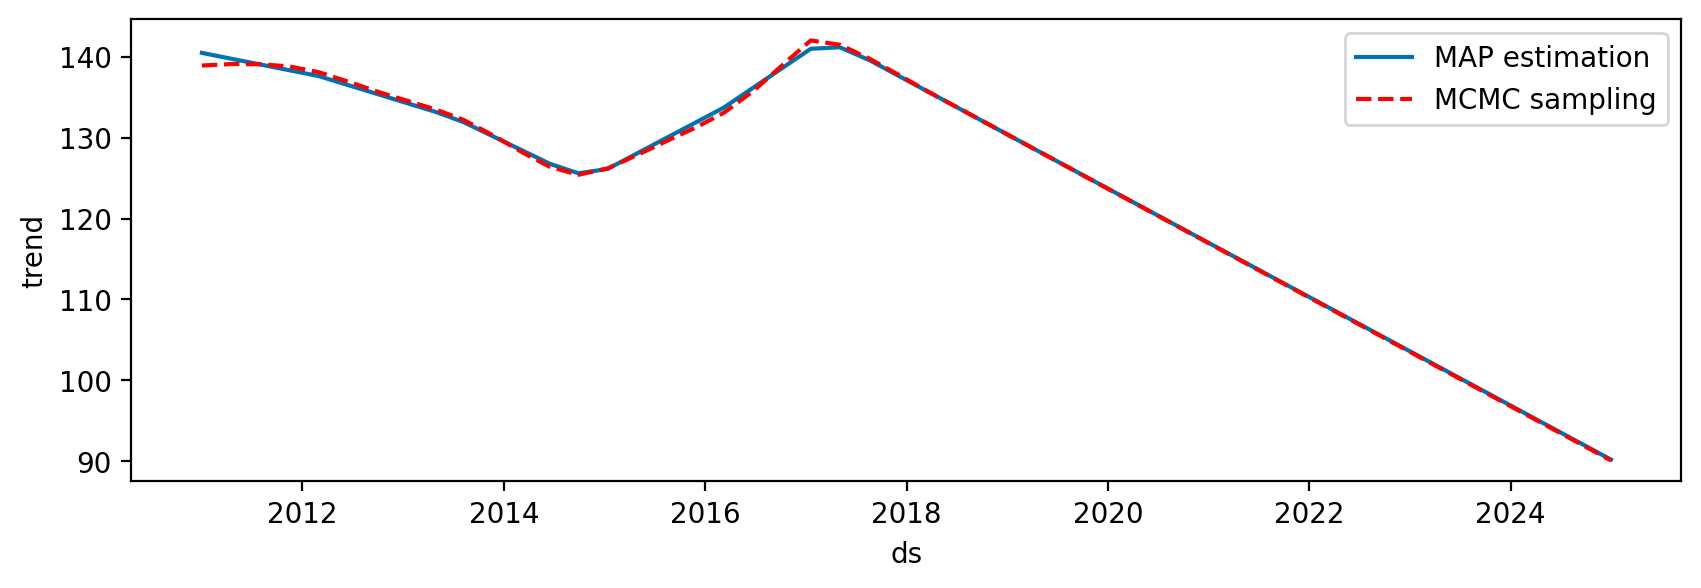

In [13]:
# сравним методы моделирования тренда
plt.figure(figsize=(10, 3))
plt.plot(f0['ds'], f0['trend'], 
         color='#0072B2', label='MAP estimation')
plt.plot(forecast['ds'], forecast['trend'], 
         color='r', ls='--', label='MCMC sampling')
plt.ylabel('trend')
plt.xlabel('ds')
plt.legend()
plt.show()

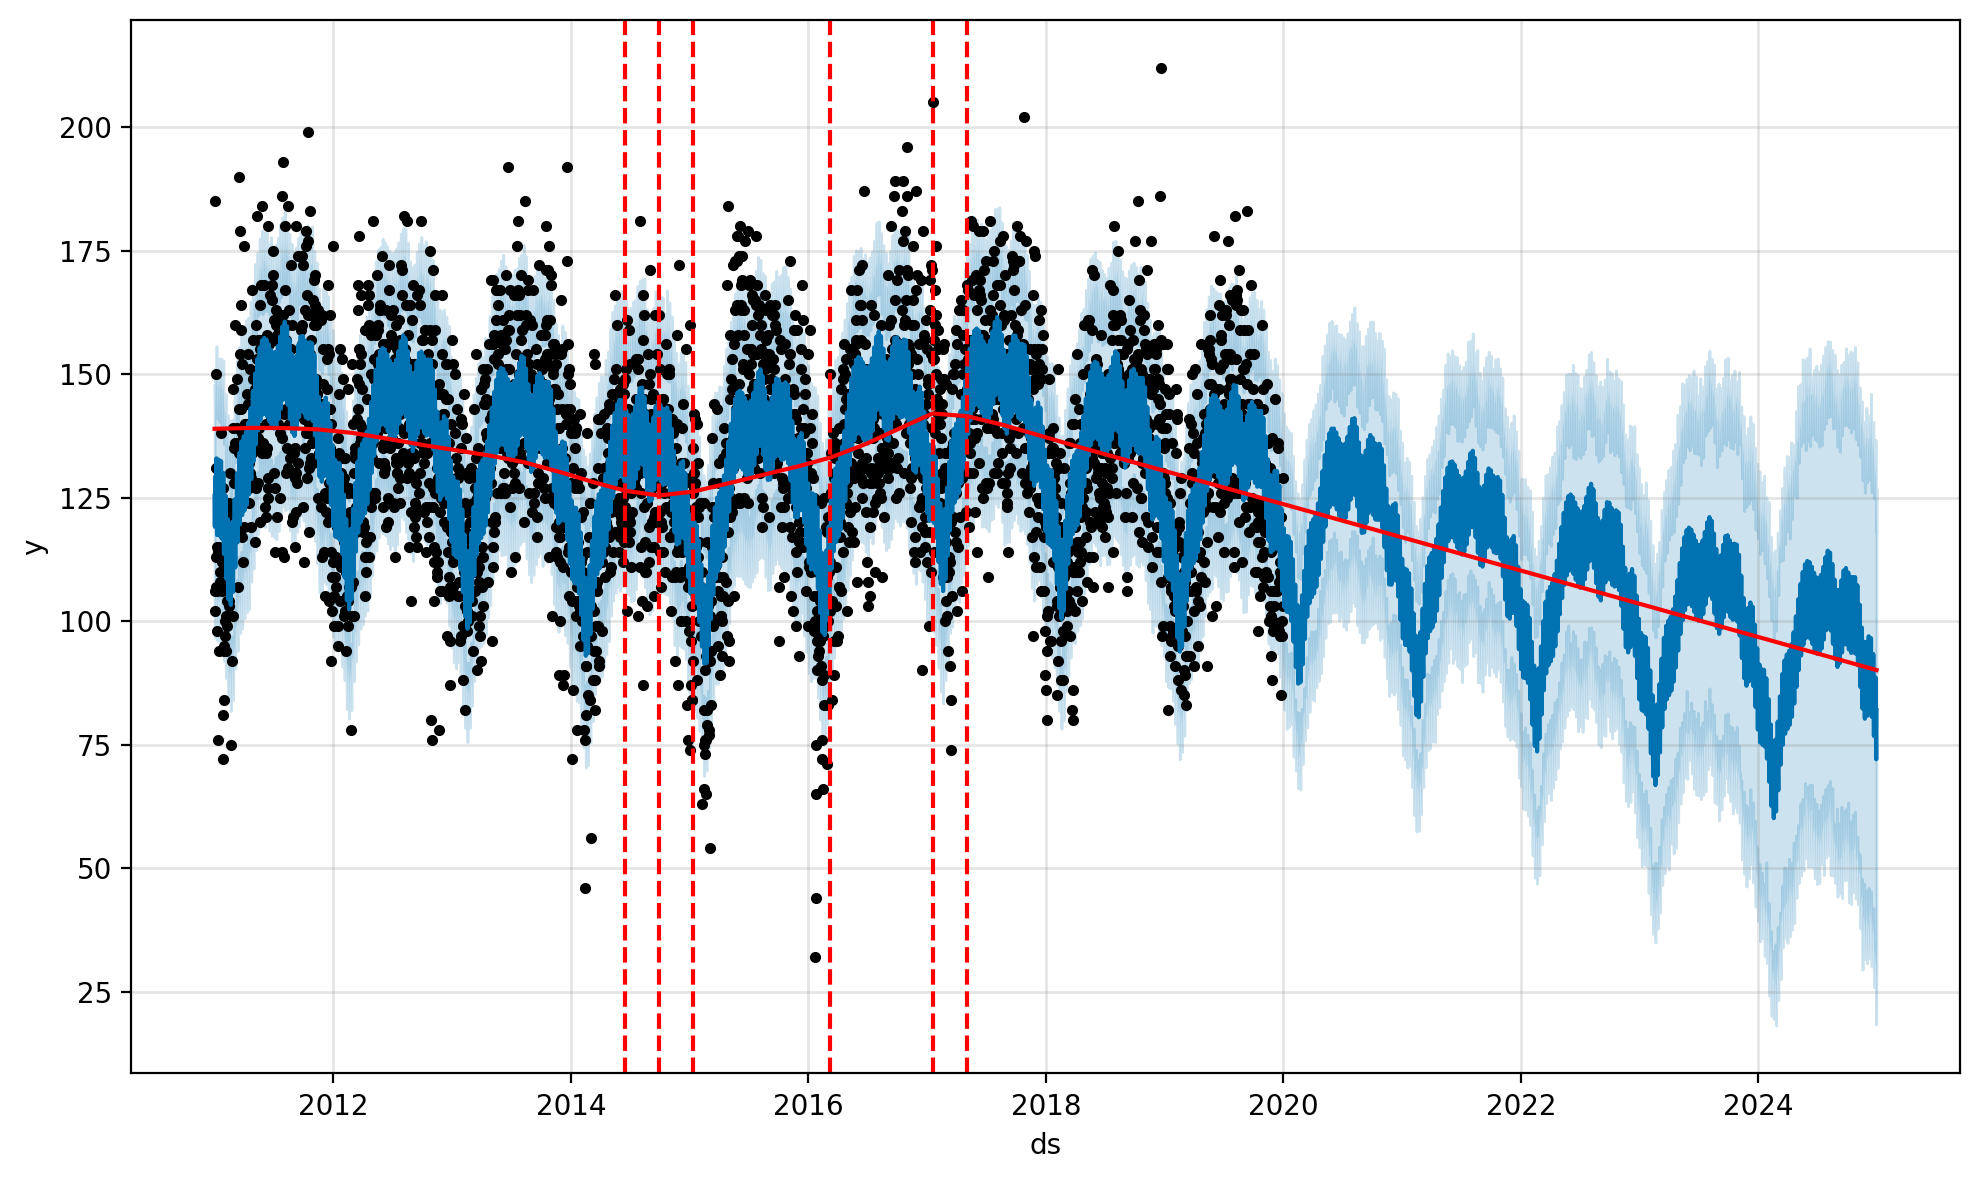

In [14]:
# поменяем порог для визуализации точек изменения
fig = model.plot(forecast)
add_changepoints_to_plot(
    fig.gca(), model, forecast, threshold=0.1)
plt.show()

In [15]:
# сохраним модель и прогнозы для
# использования в дальнейшем
m1 = model
f1 = forecast

22:22:41 - cmdstanpy - INFO - CmdStan installation /Users/artemgruzdev/anaconda3/lib/python3.10/site-packages/prophet/stan_model/cmdstan-2.26.1 missing makefile, cannot get version.
22:22:41 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
22:22:41 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

22:24:44 - cmdstanpy - INFO - CmdStan done processing.
22:24:44 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/Users/runner/work/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/Users/runner/work/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in '/Users/runner/work/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/Users/runner/work/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in '/Users/runner/work/prophet/

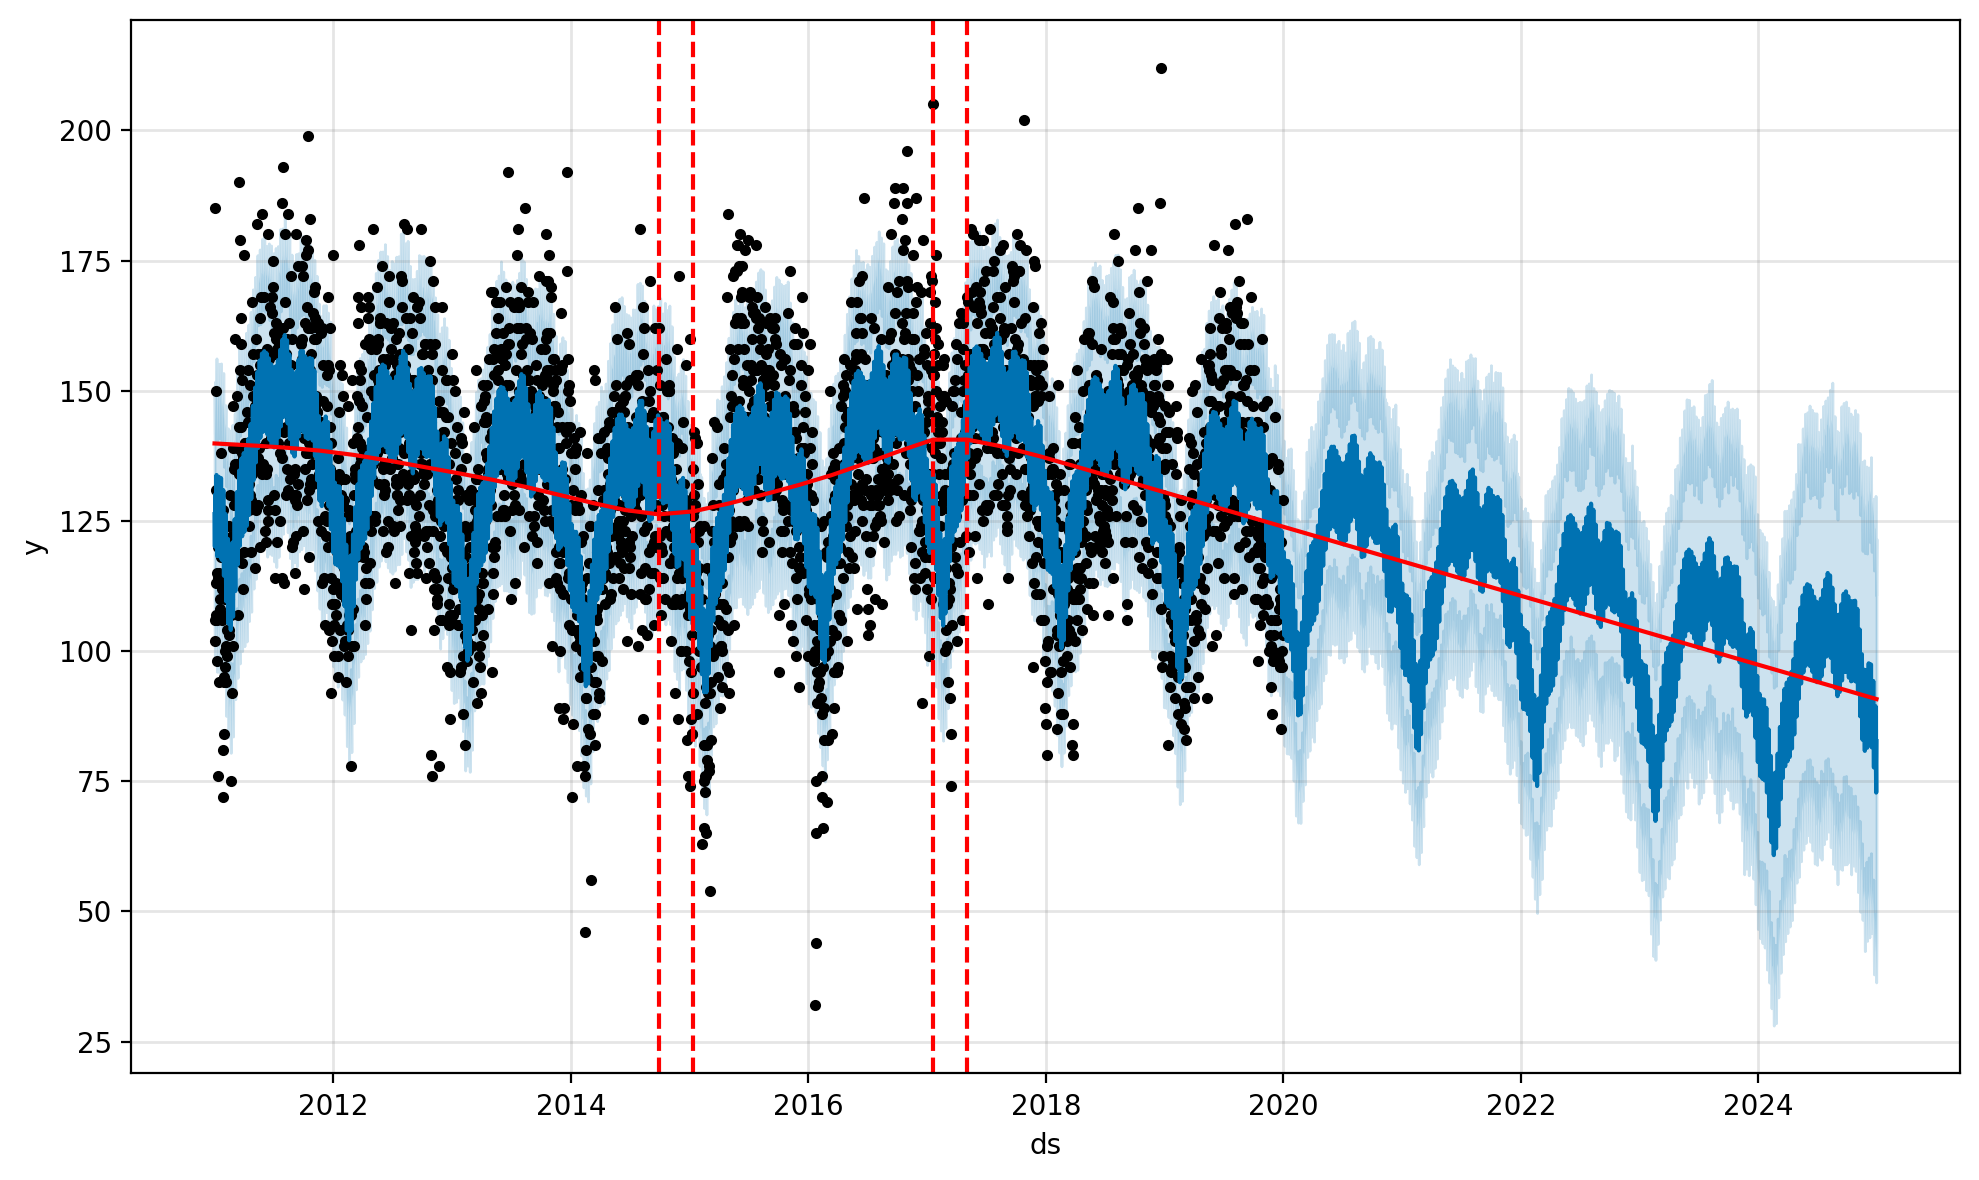

In [16]:
# cоздаем модель Prophet, уменьшив 
# changepoint_prior_scale
model = Prophet(changepoint_prior_scale=0.03,
                mcmc_samples=300)
# обучаем модель
model.fit(df)
# создаем удлиненный датафрейм, 
# задав горизонт 1825 дней (5 лет)
future = model.make_future_dataframe(periods=365 * 5)
# получаем прогнозы
forecast = model.predict(future)
# визуализируем прогнозы
fig = model.plot(forecast)
# наносим точки изменения тренда
add_changepoints_to_plot(fig.gca(), model, 
                         forecast, threshold=0.1)
plt.show()

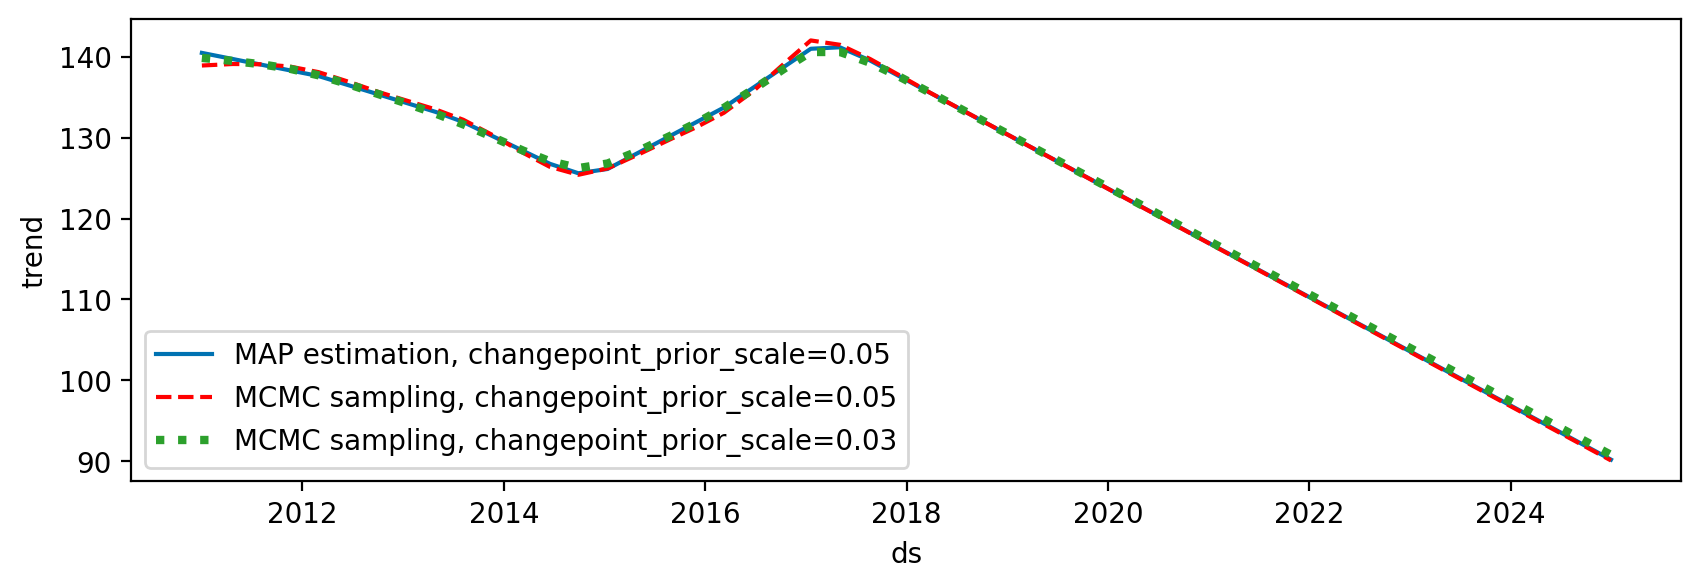

In [17]:
# сравним линии тренда при разных значениях changepoint_prior_scale 
# и разных способах оценивания
plt.figure(figsize=(10, 3))

plt.plot(f0['ds'],
         f0['trend'],
         color='#0072B2',
         label='MAP estimation, changepoint_prior_scale=0.05')

plt.plot(f1['ds'],
         f1['trend'],
         color='r',
         ls='--',
         label='MCMC sampling, changepoint_prior_scale=0.05')

plt.plot(forecast['ds'],
         forecast['trend'],
         color='tab:green',
         ls=':',
         lw=3,
         label='MCMC sampling, changepoint_prior_scale=0.03')

plt.ylabel('trend')
plt.xlabel('ds')
plt.legend()
plt.show()